In [177]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt

## Autoencoder Class

In [178]:
class autoencoder(nn.Module):
    def __init__(self,input_x,latent):
        super().__init__()
        self.encoder=nn.Sequential(
        nn.Linear(in_features=input_x,out_features=128,bias=True),
        nn.ReLU(),
        nn.Linear(in_features=128,out_features=latent,bias=True),
        nn.ReLU()
        )
        
        self.decoder=nn.Sequential(
        nn.Linear(in_features=latent,out_features=128,bias=True),
        nn.ReLU(),
        nn.Linear(in_features=128,out_features=input_x,bias=True),
        nn.ReLU()
        )
        
    def forward(self,x):
        x=self.encoder(x)
        x=self.decoder(x)
        return x

## Loading training Data

In [179]:
mnist_train=torch.utils.data.DataLoader(torchvision.datasets.MNIST('data/', train=True, download=True,
                               transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()])),
                                       batch_size=1000,shuffle=True)

## L2 regularized loss function

In [180]:
def loss_function(outputs, inputs, model):
    l2_reg=0.001
    # Compute the reconstruction loss
    recon_loss = F.mse_loss(outputs, inputs)

    # Compute the L2 regularization loss
    l2_loss = 0.0
    for name, param in model.named_parameters():
        if 'weight' in name:
            l2_loss += torch.norm(param)

    # Combine the reconstruction loss and the L2 regularization loss
    loss = recon_loss + l2_reg * l2_loss

    return loss

In [181]:
for latent in [32,64]:
    print(f"For latent dimension {latent}")
    ae=autoencoder(784,latent)
    optimizer=torch.optim.Adam(ae.parameters(),lr=1e-4)
    criterion=loss_function
    epochs=10
    for epoch in range(1,epochs+1):
        for data in mnist_train:
                img=data[0]
                img=img.view(img.size(0),-1)
                optimizer.zero_grad()
                output=ae(img)
                loss=criterion(output,img,ae)
                loss.backward()
                optimizer.step()
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch, epochs, loss.item()))
    

For latent dimension 32
Epoch [1/10], Loss: 0.1190
Epoch [2/10], Loss: 0.1054
Epoch [3/10], Loss: 0.0980
Epoch [4/10], Loss: 0.0874
Epoch [5/10], Loss: 0.0794
Epoch [6/10], Loss: 0.0754
Epoch [7/10], Loss: 0.0700
Epoch [8/10], Loss: 0.0672
Epoch [9/10], Loss: 0.0636
Epoch [10/10], Loss: 0.0614
For latent dimension 64
Epoch [1/10], Loss: 0.1233
Epoch [2/10], Loss: 0.1051
Epoch [3/10], Loss: 0.0971
Epoch [4/10], Loss: 0.0890
Epoch [5/10], Loss: 0.0789
Epoch [6/10], Loss: 0.0711
Epoch [7/10], Loss: 0.0676
Epoch [8/10], Loss: 0.0627
Epoch [9/10], Loss: 0.0612
Epoch [10/10], Loss: 0.0583


## Loading dataset for testing data

In [182]:
mnist_test=torch.utils.data.DataLoader(torchvision.datasets.MNIST('data/', train=False, download=True,
                               transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()])),
                                       batch_size=10,shuffle=True)

## plot function

In [187]:
def plot_images(x,y):
    fig, axs = plt.subplots(nrows=2, ncols=x.shape[0],figsize=(2, 2))

    for i in range(x.shape[0]):
        # Plot the input image
        axs[0][i].imshow(x[i].reshape(28, 28), cmap='gray')
        axs[0][i].axis('off')

        # Plot the output image
        axs[1][i].imshow(y[i].reshape(28, 28), cmap='gray')
        axs[1][i].axis('off')

    plt.show()

For latent dimension 32


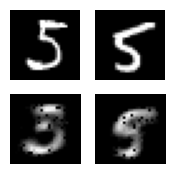

test loss=0.05837430427595973


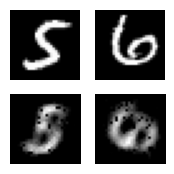

test loss=0.058374304294586184


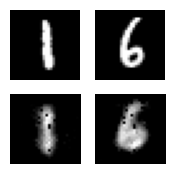

test loss=0.05837430419027805


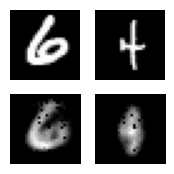

test loss=0.058374304167926314


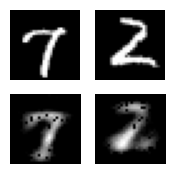

test loss=0.05837430432066321


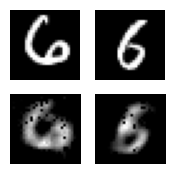

test loss=0.05837430422380566


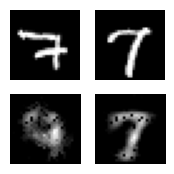

test loss=0.058374304227530954


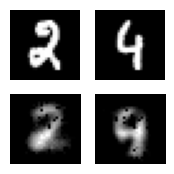

test loss=0.05837430426850915


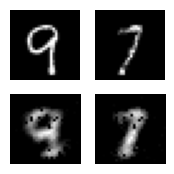

test loss=0.05837430415302515


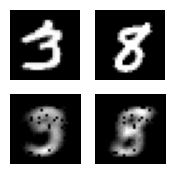

test loss=0.05837430427223444
For latent dimension 64


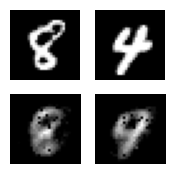

test loss=0.0583743042871356


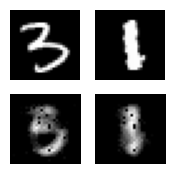

test loss=0.05837430439889431


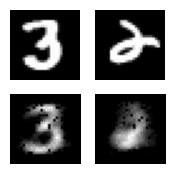

test loss=0.05837430444732308


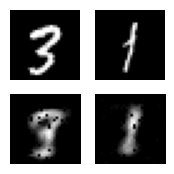

test loss=0.058374304424971345


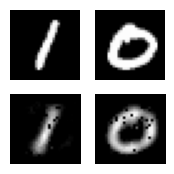

test loss=0.058374304078519346


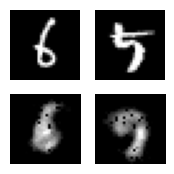

test loss=0.05837430422380566


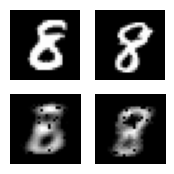

test loss=0.058374304205179216


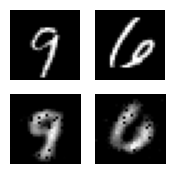

test loss=0.05837430420890451


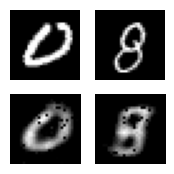

test loss=0.05837430429086089


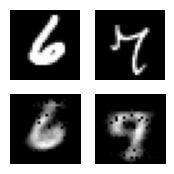

test loss=0.05837430440634489


In [188]:
for latent in [32,64]:
    print(f"For latent dimension {latent}")
    for i in range(10):
        test_loss=0
        with torch.no_grad():
            for data in mnist_test:
                # Forward pass through the autoencoder
                img=data[0]
                img=img.view(img.size(0),-1)
                outputs = ae(img)

                # Compute the reconstruction loss
                loss = criterion(outputs, img,ae)

                # Accumulate the total loss over the test set
                test_loss += loss.item() * img.size(0)

                # Convert the output and input images to NumPy arrays for visualization
                output_images = outputs.detach().numpy()
                input_images = img.numpy()

                # Plot the input and output images side by side
        plot_images(input_images[:2], output_images[:2])
        avg_test_loss=test_loss/len(mnist_test.dataset)
        print(f"test loss={avg_test_loss}")